# Problem Statement - 1

Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans,DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing Airline Data
airlineData=pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')
airlineData.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


#### EDA

In [3]:
airlineData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
#checking for duplicates
airlineData.duplicated().sum()

0

In [5]:
#renaming ID and Awards--> We can also drop here
airlineData=airlineData.rename(columns={'ID#':'ID','Award?':'Award'})

In [6]:
airlineData.head(2)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0


#### Data Preprocessing 

In [7]:
# We have seen that the Id and award is no more needed to perform clustering so we are dropping both columns
airlineData1=airlineData.drop(['ID','Award'],axis=1)
airlineData1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


#### Normalization 

In [8]:
airline2_norm=pd.DataFrame(normalize(airlineData1),columns=airlineData1.columns)
airline2_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718
...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509


#### Standardization 

In [9]:
airline2_std=pd.DataFrame(StandardScaler().fit_transform(airlineData1),columns=airlineData1.columns)
airline2_std

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975
...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088


### 1. Hierarchial Clustering 

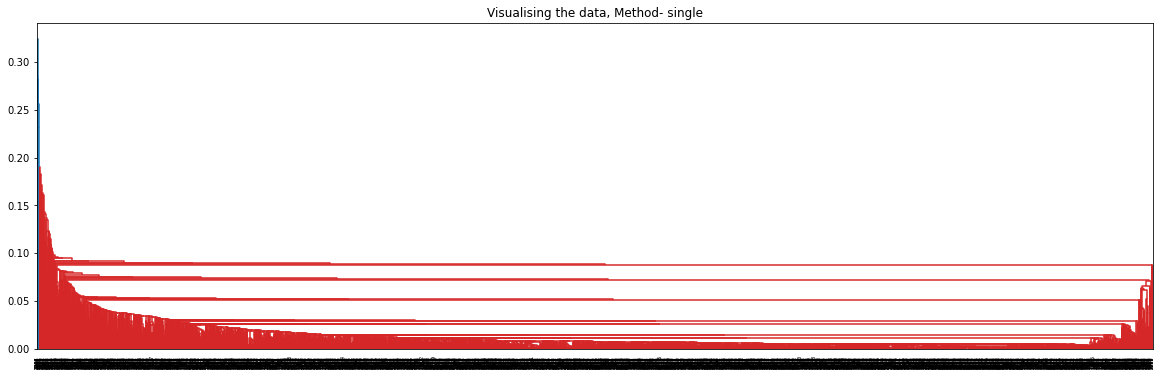

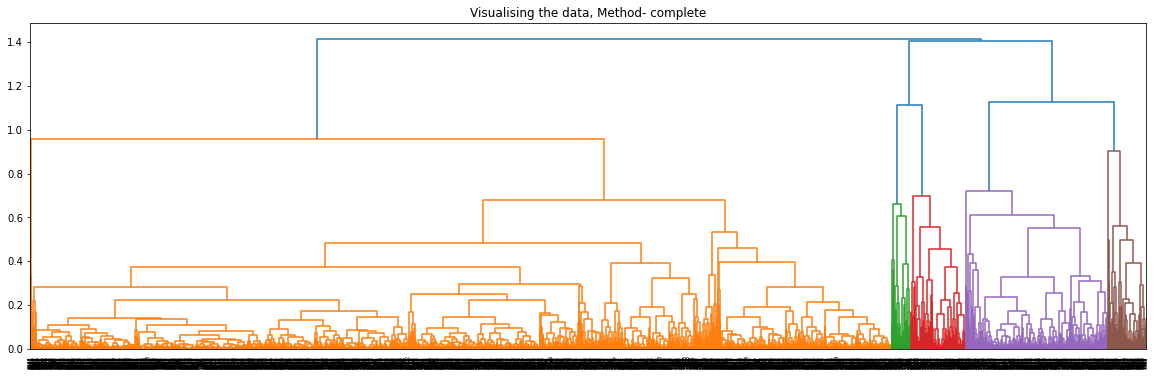

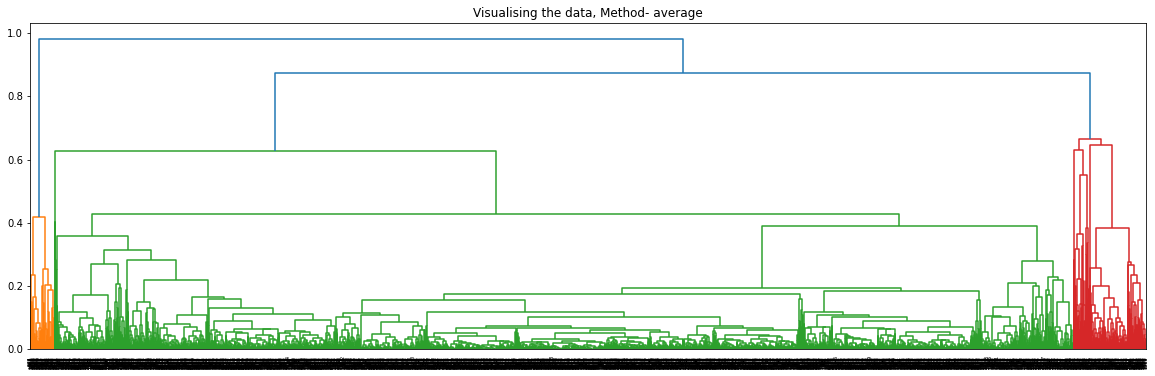

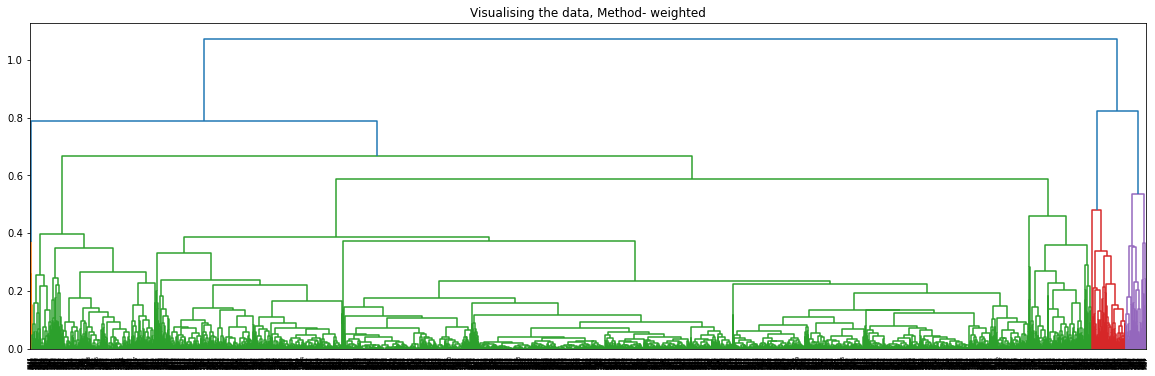

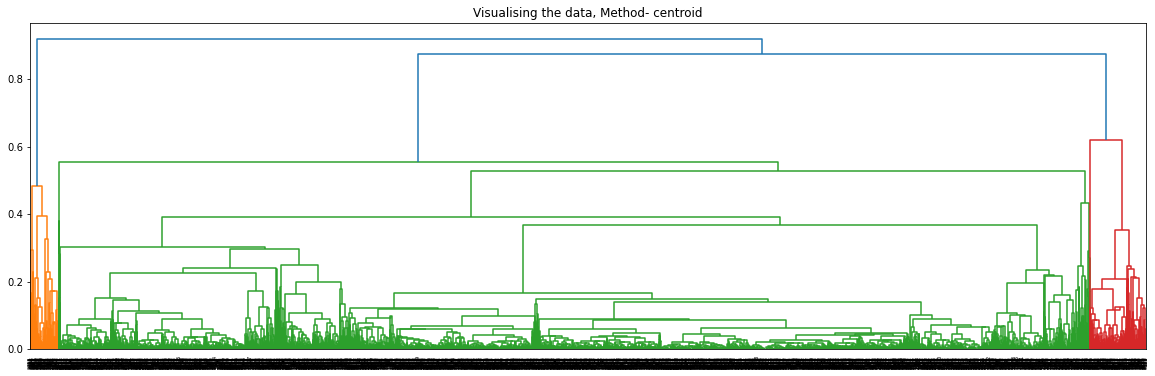

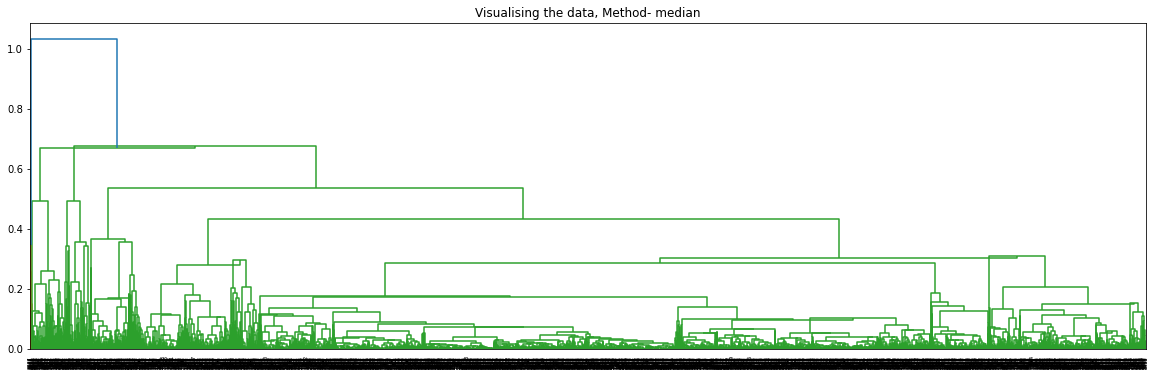

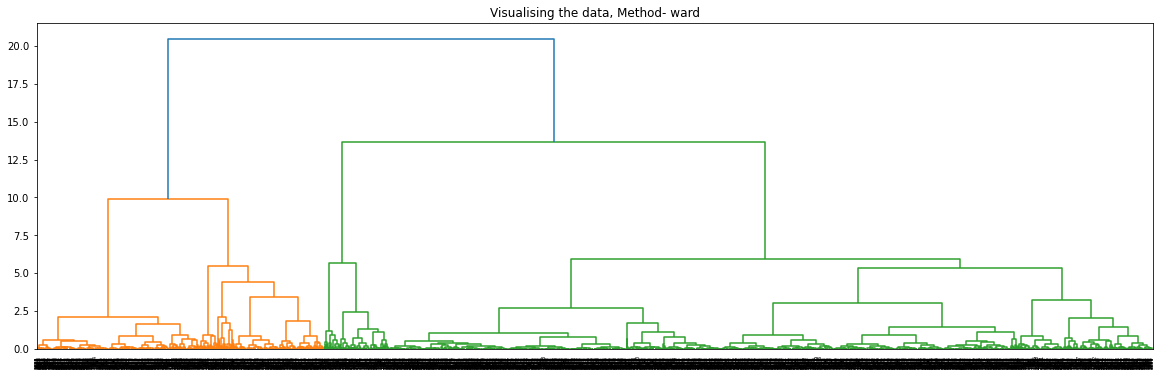

In [10]:
# Create dendrogram of normalization data for all methots 
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
     plt.figure(figsize =(20, 6))
     plt.title('Visualising the data, Method- {}'.format(methods)) 
     Dendrogram = sch.dendrogram(sch.linkage(airline2_norm, method = methods,optimal_ordering=False))


In [11]:
nc=[2,3,4,5,6,7,8,9]

for i in nc:
    for linkages in ['ward','single','average','complete']:
        hc = AgglomerativeClustering(n_clusters=i,affinity = 'euclidean', linkage = linkages)
        y = hc.fit_predict(airline2_norm)
        sc=silhouette_score(airline2_norm,y)
        print('Clusters = {}, linkage = {}, Sc score = {}'.format(i,linkages,sc))
    print()

Clusters = 2, linkage = ward, Sc score = 0.5139372045034354
Clusters = 2, linkage = single, Sc score = 0.6414807597188987
Clusters = 2, linkage = average, Sc score = 0.6199075368947913
Clusters = 2, linkage = complete, Sc score = 0.5414238117493092

Clusters = 3, linkage = ward, Sc score = 0.5501327870968798
Clusters = 3, linkage = single, Sc score = 0.4980808146158188
Clusters = 3, linkage = average, Sc score = 0.6023264073883706
Clusters = 3, linkage = complete, Sc score = 0.5757037645688332

Clusters = 4, linkage = ward, Sc score = 0.45392607934250745
Clusters = 4, linkage = single, Sc score = 0.45957880996099165
Clusters = 4, linkage = average, Sc score = 0.5734105133284102
Clusters = 4, linkage = complete, Sc score = 0.5322356437626531

Clusters = 5, linkage = ward, Sc score = 0.31026334777845854
Clusters = 5, linkage = single, Sc score = 0.42528433822274675
Clusters = 5, linkage = average, Sc score = 0.5687644465781913
Clusters = 5, linkage = complete, Sc score = 0.50817558014894

Selected Cluster 5

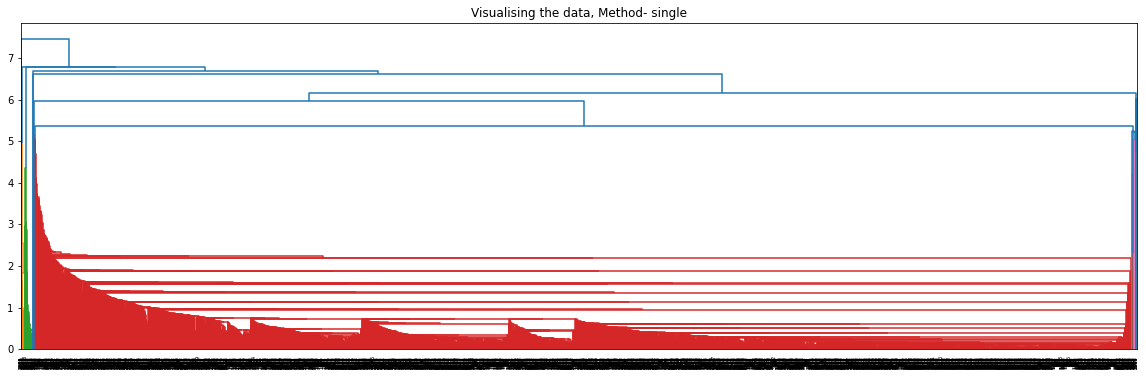

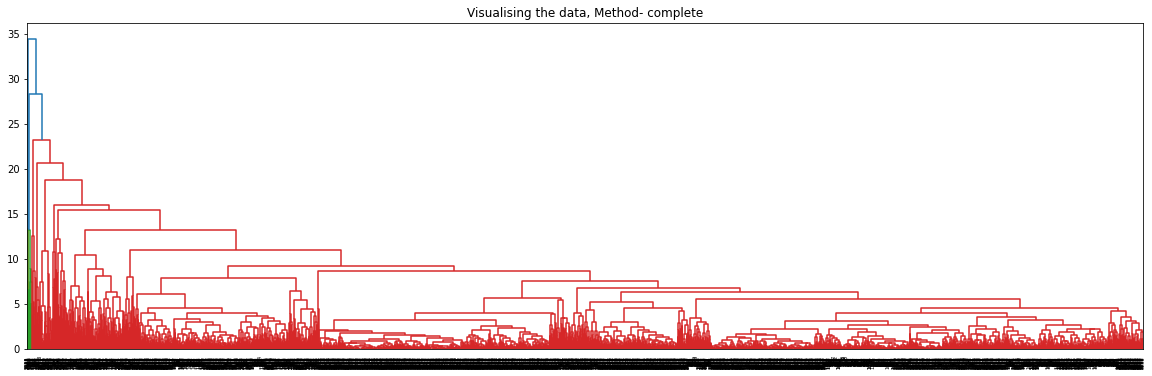

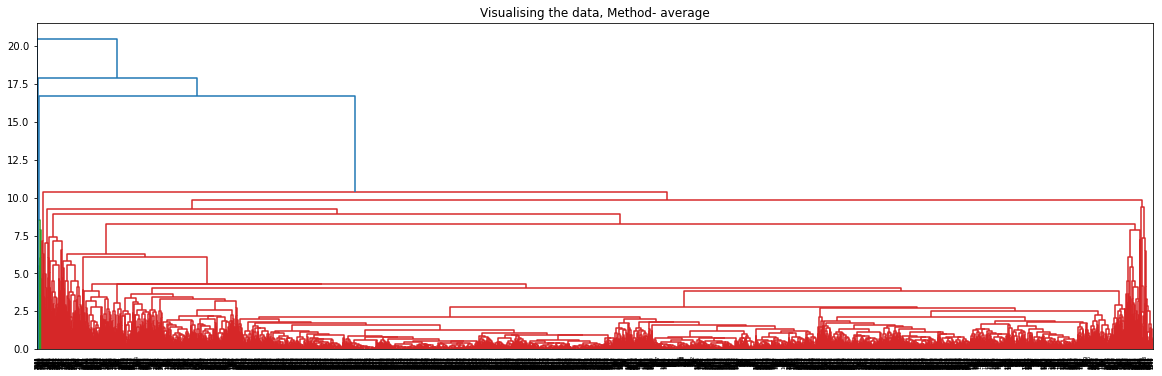

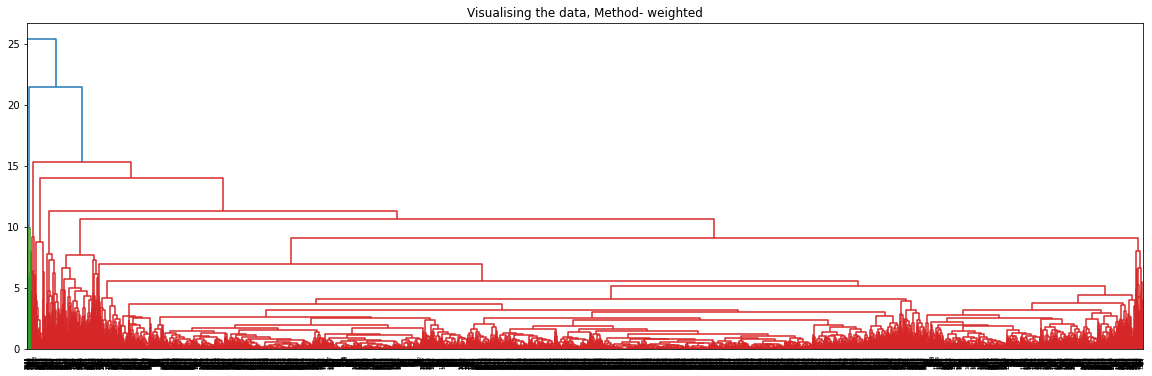

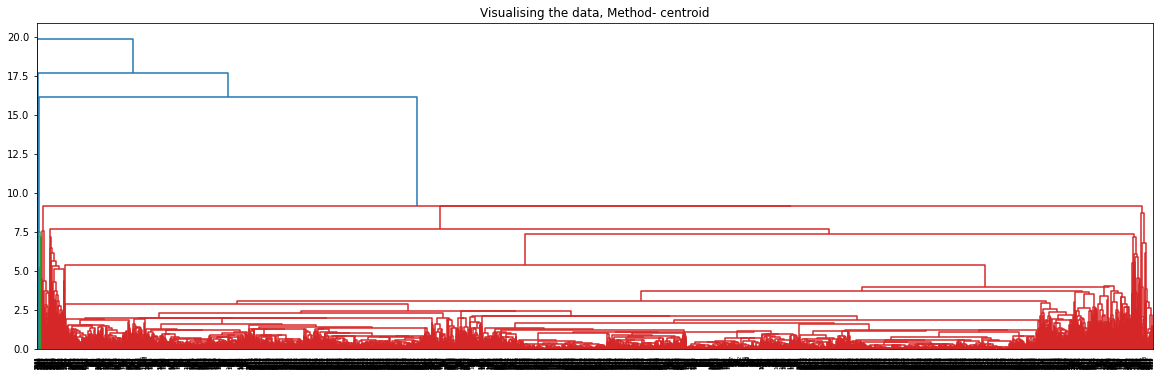

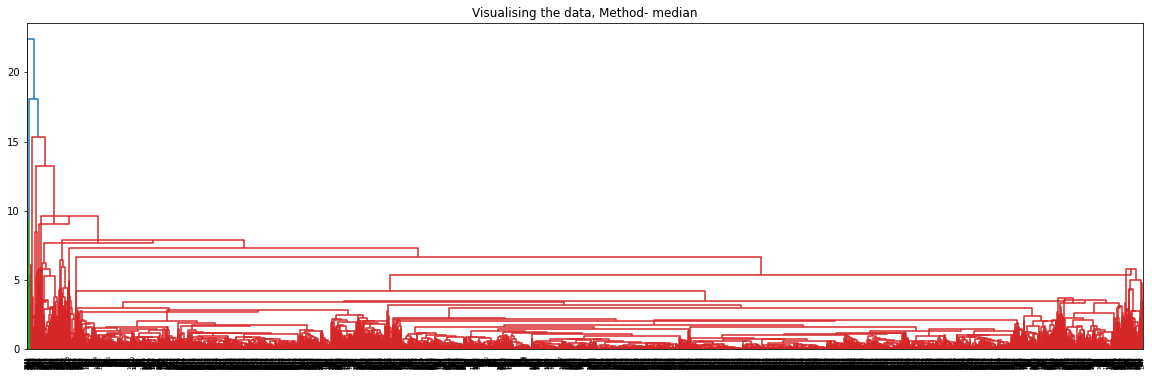

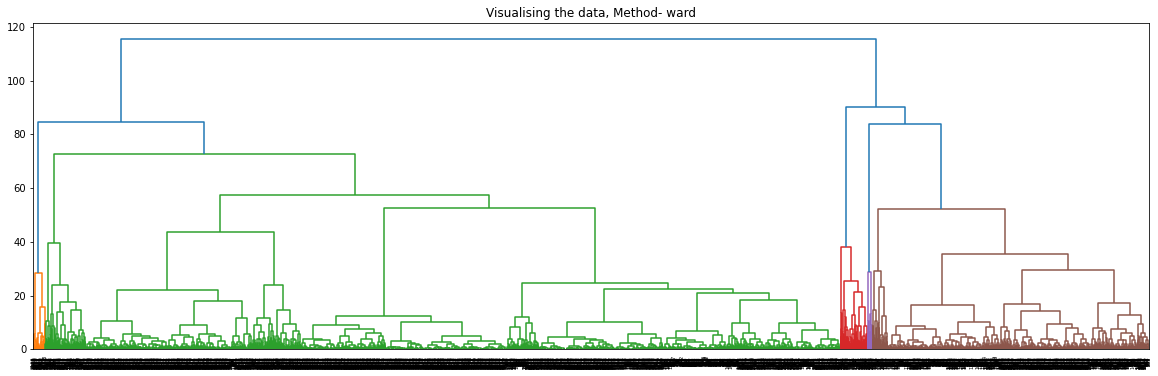

In [12]:
# Create dendrogram of Standarization data for all methots 
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
     plt.figure(figsize =(20, 6))
     plt.title('Visualising the data, Method- {}'.format(methods)) 
     Dendrogram = sch.dendrogram(sch.linkage(airline2_std, method = methods,optimal_ordering=False))

In [13]:
nc=[2,3,4,5,6,7,8,9]

for i in nc:
    for linkages in ['ward','single','average','complete']:
        hc = AgglomerativeClustering(n_clusters=i,affinity = 'euclidean', linkage = linkages)
        y = hc.fit_predict(airline2_std)
        sc=silhouette_score(airline2_std,y)
        print('Clusters = {}, linkage = {}, Sc score = {}'.format(i,linkages,sc))
    print()

Clusters = 2, linkage = ward, Sc score = 0.32507831694250006
Clusters = 2, linkage = single, Sc score = 0.867447784990924
Clusters = 2, linkage = average, Sc score = 0.8256575339976112
Clusters = 2, linkage = complete, Sc score = 0.8256575339976112

Clusters = 3, linkage = ward, Sc score = 0.31619409882758315
Clusters = 3, linkage = single, Sc score = 0.7558737036833013
Clusters = 3, linkage = average, Sc score = 0.8003599006619796
Clusters = 3, linkage = complete, Sc score = 0.7938964005121698

Clusters = 4, linkage = ward, Sc score = 0.3350233247024554
Clusters = 4, linkage = single, Sc score = 0.5721231743724757
Clusters = 4, linkage = average, Sc score = 0.7910117556031853
Clusters = 4, linkage = complete, Sc score = 0.665996385744917

Clusters = 5, linkage = ward, Sc score = 0.32701816589484084
Clusters = 5, linkage = single, Sc score = 0.5720046397404054
Clusters = 5, linkage = average, Sc score = 0.7879755328794891
Clusters = 5, linkage = complete, Sc score = 0.6641926233263997


In [14]:
# Create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='average')
hclusters

AgglomerativeClustering(linkage='average', n_clusters=5)

In [15]:
y_hc=hclusters.fit_predict(airline2_std)

In [16]:
y_hc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
airlineData_hc=airlineData

In [18]:
airlineData_hc['HC_clusterID']=y_hc
airlineData_hc.head(2)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,HC_clusterID
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0


In [19]:
airlineData_hc.groupby('HC_clusterID').agg(['count']).reset_index()

,HC_clusterID,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,count,count,count,count,count,count,count,count,count,count,count,count
0,0,3979,3979,3979,3979,3979,3979,3979,3979,3979,3979,3979,3979
1,1,15,15,15,15,15,15,15,15,15,15,15,15
2,2,1,1,1,1,1,1,1,1,1,1,1,1
3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,4,1,1,1,1,1,1,1,1,1,1,1,1


In [20]:
airlineData_hc.groupby('HC_clusterID').agg('mean')

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
HC_clusterID,,,,,,,,,,,,
0,2015.455893,7.288966e+04,144.193013,2.054034,1.014577,1.000754,16806.654184,11.476753,439.180699,1.319176,4117.825333,0.368937
1,1664.866667,1.380614e+05,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
2,279.000000,1.704838e+06,0.000000,1.000000,1.000000,1.000000,17108.000000,32.000000,4823.000000,23.000000,7283.000000,1.000000
3,2968.666667,1.226280e+05,296.000000,3.000000,1.000000,1.000000,63527.666667,63.666667,16341.000000,48.000000,2476.000000,1.000000
4,3606.000000,1.601140e+05,500.000000,1.000000,1.000000,1.000000,71954.000000,86.000000,30817.000000,53.000000,1373.000000,1.000000


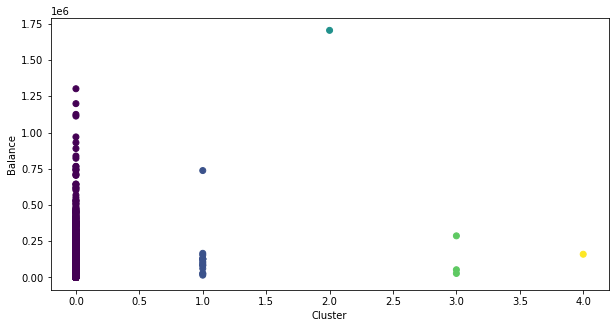

In [21]:
#plt Cluster
plt.figure(figsize=(10,5))
plt.scatter(airlineData_hc['HC_clusterID'],airlineData['Balance'],c=hclusters.labels_)
plt.xlabel('Cluster')
plt.ylabel('Balance')
plt.show()

#### K-Means Clustering

In [22]:
#Finding optimal number of cluster for normalize data
#using Elbow method and silhoutte method

nc=[2,3,4,5,6,7,8,9]
iner=[]
silscore =[]

for i in nc:
    Km=KMeans(i)
    Km.fit(airline2_norm)
    iner.append(Km.inertia_)

                    
for i in nc:
    hc = KMeans(n_clusters=i)
    y=hc.fit_predict(airline2_norm)
    silscore.append(silhouette_score(airline2_norm,y))


Text(0.5, 1.0, 'Silhoutte Score')

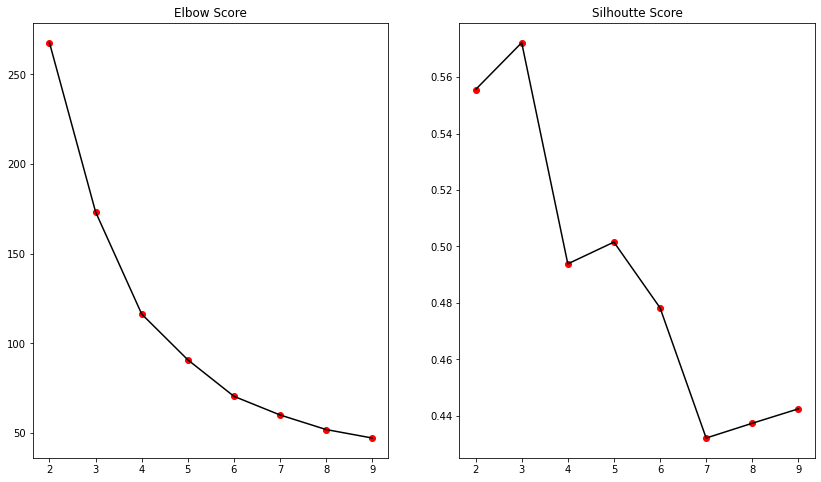

In [23]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.title('Elbow Score')
                    
plt.subplot(1,2,2)
plt.plot(nc,silscore,color="black")
plt.scatter(nc,silscore,color="red")
plt.title('Silhoutte Score')

In [24]:
#Finding optimal number of cluster for standarize data
#using Elbow method and silhoutte method

nc=[2,3,4,5,6,7,8,9]
iner=[]
silscore =[]

for i in nc:
    Km=KMeans(i)
    Km.fit(airline2_std)
    iner.append(Km.inertia_)

                    
for i in nc:
    hc = KMeans(n_clusters=i)
    y=hc.fit_predict(airline2_std)
    silscore.append(silhouette_score(airline2_std,y))

Text(0.5, 1.0, 'Silhoutte Score')

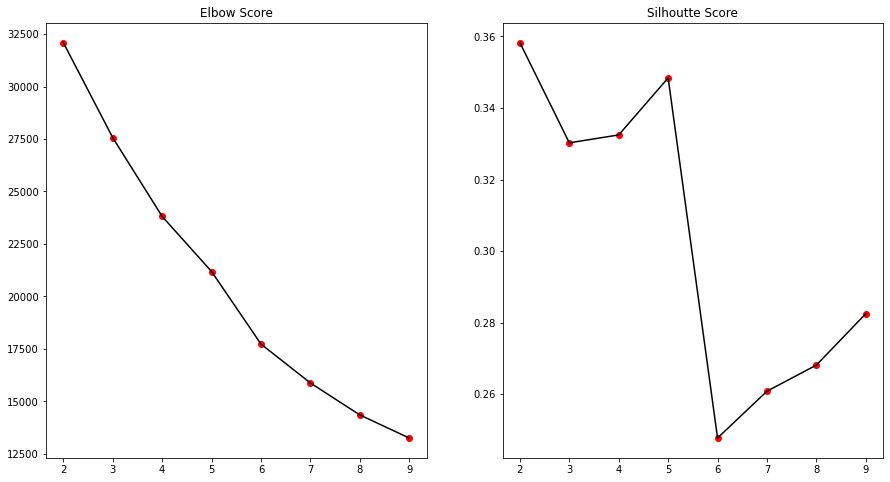

In [25]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.title('Elbow Score')
                    
plt.subplot(1,2,2)
plt.plot(nc,silscore,color="black")
plt.scatter(nc,silscore,color="red")
plt.title('Silhoutte Score')

# Conclusion:
1. By Seeing both dataset Normalization data getting high silhoutte score
2. The best average optimal number of cluster we are getting is 5

In [26]:
#Creating Kmeans clustering for 5 cluster
model=KMeans(5)
model.fit(airline2_norm)
model.labels_

array([0, 4, 0, ..., 1, 0, 4])

In [27]:
airlinedata_km=airlineData1
airlinedata_km['cluster id']=pd.Series(model.labels_)
airlinedata_km

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster id
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,4
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,4
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


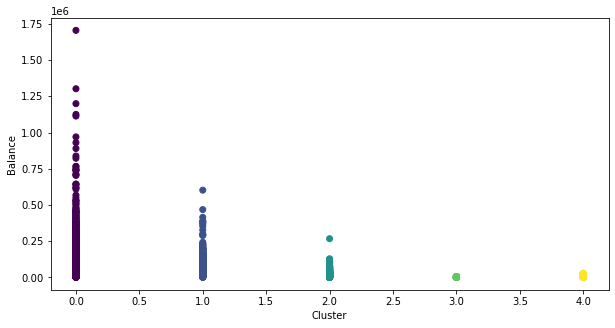

In [28]:
plt.figure(figsize=(10,5))
plt.scatter(airlinedata_km['cluster id'],airlineData['Balance'],c=model.labels_)
plt.xlabel('Cluster')
plt.ylabel('Balance')
plt.show()

In [29]:
airlinedata_km.groupby('cluster id').agg(['count']).reset_index()

,cluster id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,,count,count,count,count,count,count,count,count,count,count
0,0,2144,2144,2144,2144,2144,2144,2144,2144,2144,2144
1,1,1005,1005,1005,1005,1005,1005,1005,1005,1005,1005
2,2,351,351,351,351,351,351,351,351,351,351
3,3,111,111,111,111,111,111,111,111,111,111
4,4,388,388,388,388,388,388,388,388,388,388


####  DBSCAN

In [30]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler=MinMaxScaler()
data=scaler.fit_transform(airlineData1)
data

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        1.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        0.25      ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        1.        ]])

In [32]:
dbs=DBSCAN(min_samples=5,eps=0.2)
claas_pr=dbs.fit_predict(data)
claas_pr

array([0, 1, 0, ..., 3, 0, 1], dtype=int64)

In [33]:
dbs_df=airlineData1.copy()
dbs_df['clusters']=claas_pr
dbs_df['clusters'].value_counts()

 0     1469
 1      383
 2      284
 4      266
 3      251
-1      194
 5      172
 15     171
 6      143
 8      116
 9      110
 7       87
 14      80
 10      76
 12      66
 11      62
 13      34
 18      13
 16      10
 17       6
 19       6
Name: clusters, dtype: int64

In [34]:
# Using groupby function to sort by Clusters
dbs_df.groupby(['clusters']).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster id
clusters,,,,,,,,,,,
-1,208387.747423,1478.484536,2.819588,1.154639,1.252577,50933.613402,27.000000,3214.154639,9.515464,5024.206186,0.93299
0,62691.605174,142.499660,1.000000,1.000000,1.000000,3187.840027,6.127297,451.245065,1.361470,3546.405037,0.00000
1,11710.840731,13.224543,1.000000,1.000000,1.000000,961.973890,3.446475,94.433420,0.297650,4904.253264,4.00000
2,84687.852113,38.651408,4.000000,1.000000,1.000000,39273.302817,18.626761,335.218310,0.950704,4696.095070,1.00000
3,46832.533865,38.533865,3.000000,1.000000,1.000000,20106.673307,15.992032,186.537849,0.573705,3900.689243,1.00000
4,130526.360902,39.958647,3.000000,1.000000,1.000000,18220.330827,16.552632,262.067669,0.763158,4828.458647,0.00000
5,86755.837209,36.156977,2.000000,1.000000,1.000000,9496.912791,14.186047,124.883721,0.383721,4415.953488,0.00000
6,147031.790210,41.202797,5.000000,1.000000,1.000000,71001.272727,21.076923,322.293706,1.034965,5082.433566,1.00000
7,28246.287356,55.597701,4.000000,1.000000,1.000000,41139.402299,18.517241,262.735632,0.862069,4445.126437,2.00000


# Problem Statement - 2

Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States

In [35]:
crimeData = pd.read_csv("crime_data.csv")
crimeData

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


###  EDA

In [36]:
crimeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [38]:
crimeData.duplicated().sum()

0

In [39]:
crimeData.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [40]:
crimeData.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [41]:
crimeData.head(2)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5


In [43]:
crimeData.rename(columns = {'Unnamed: 0':'Area'}, inplace = True)

In [44]:
crimeData.columns

Index(['Area', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

### Data preprocessing

 I am using two transformation methods to check how clusters forms in two different transformation

In [47]:
#dropping area column since it is not needed
crimeData.drop(columns='Area',inplace=True)

In [48]:
crimeData.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [50]:
crimeData.head(2)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5


In [52]:
crime_norm=pd.DataFrame(normalize(crimeData),columns=crimeData.columns)
crime_norm

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295
5,0.035594,0.919142,0.351437,0.174367
6,0.024486,0.816202,0.571341,0.082362
7,0.023674,0.954965,0.288897,0.063397
8,0.044478,0.967547,0.231056,0.092134
9,0.078534,0.952332,0.270805,0.116446


#### Standarization

In [53]:
crime_std=pd.DataFrame(StandardScaler().fit_transform(crimeData),columns=crimeData.columns)
crime_std

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


### Visualization of data

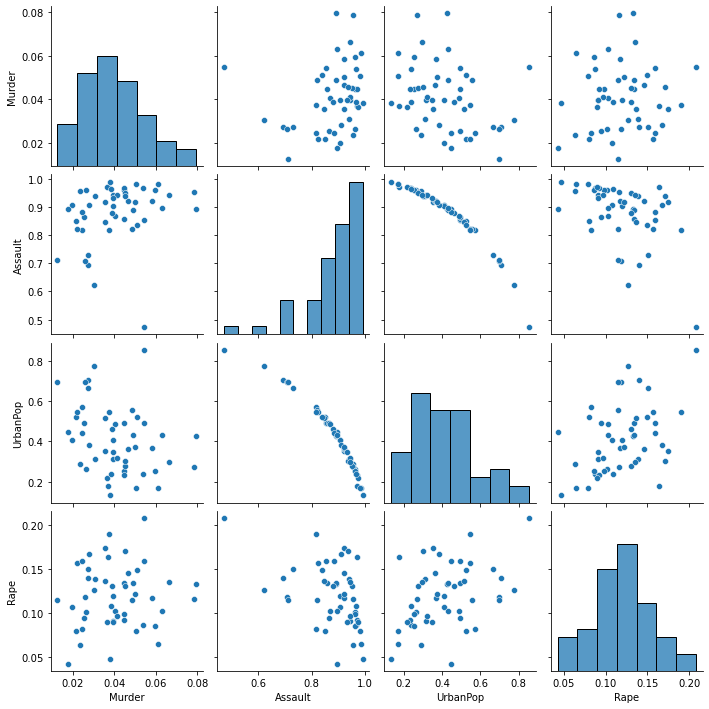

In [54]:
sns.pairplot(crime_norm)
plt.show()

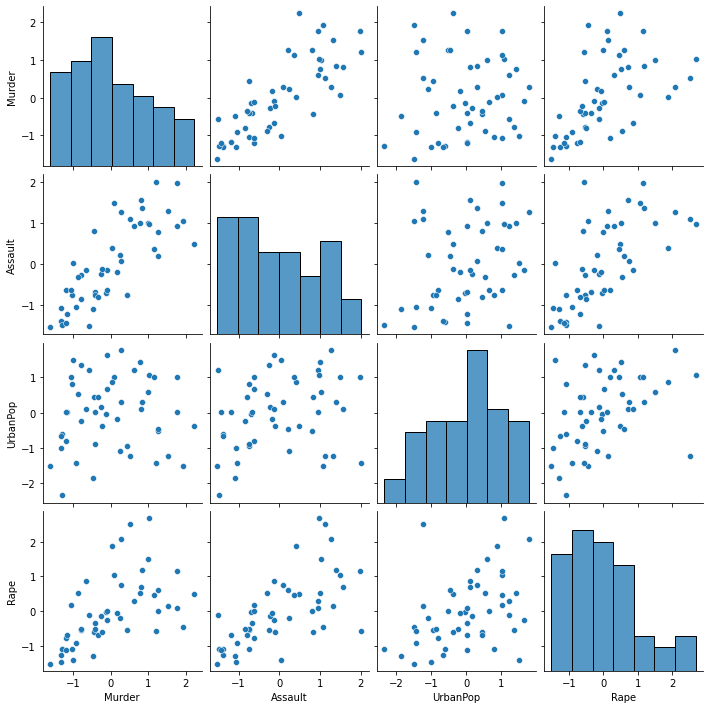

In [55]:
sns.pairplot(crime_std)
plt.show()

###  Hierarchical Clustering

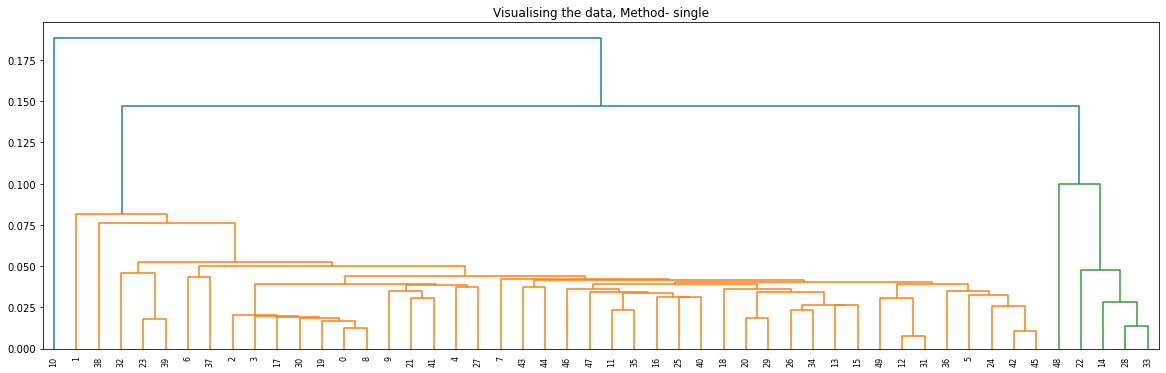

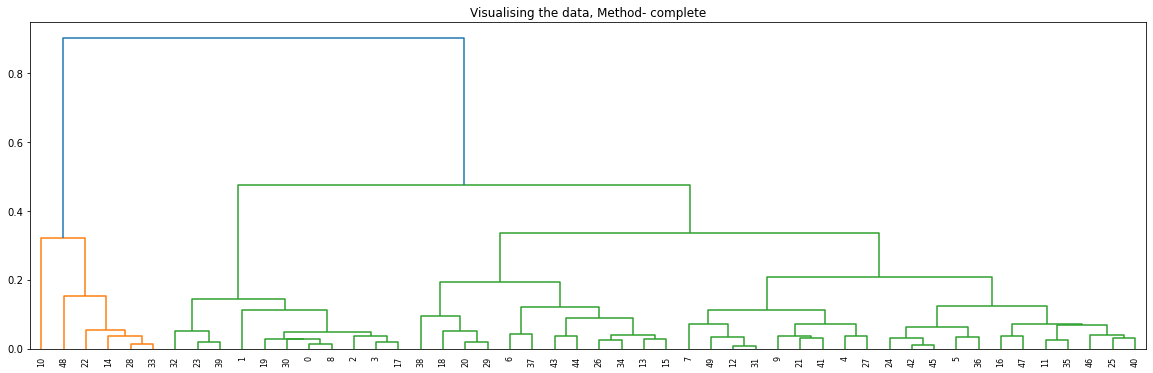

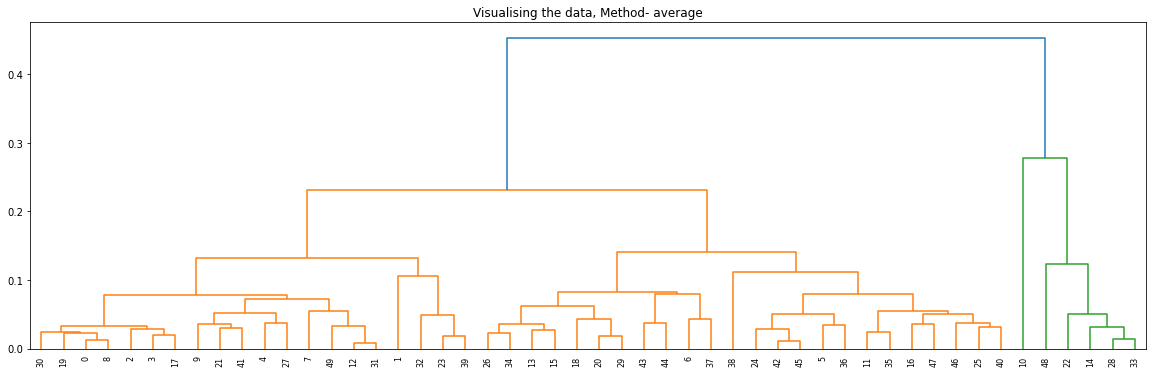

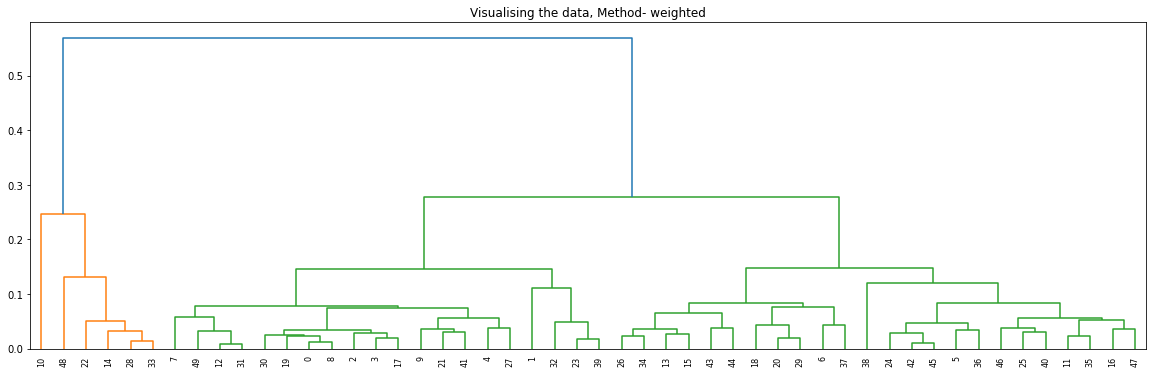

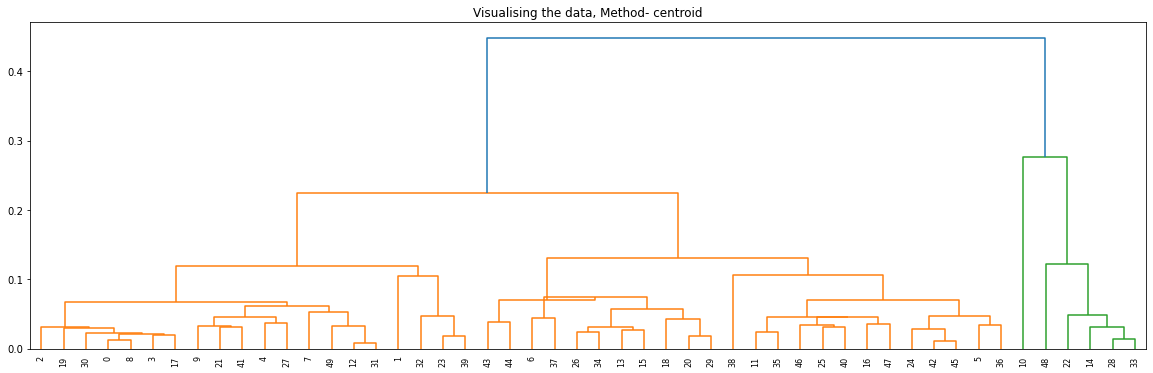

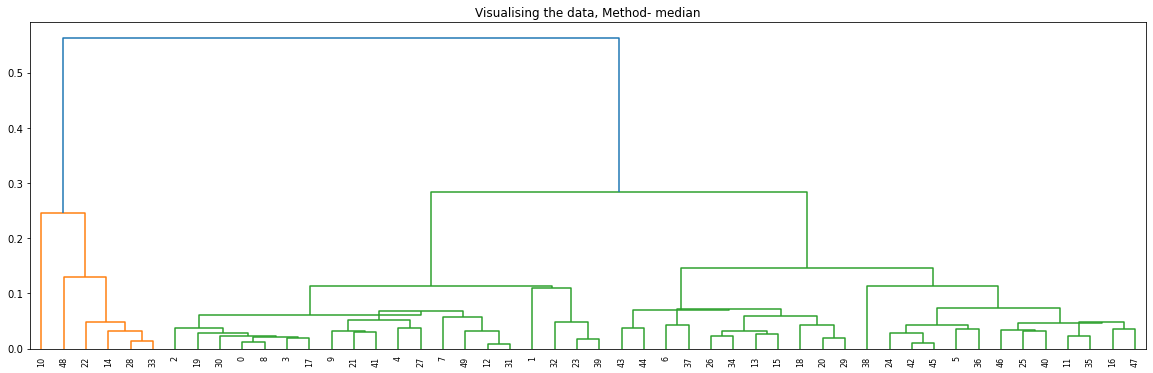

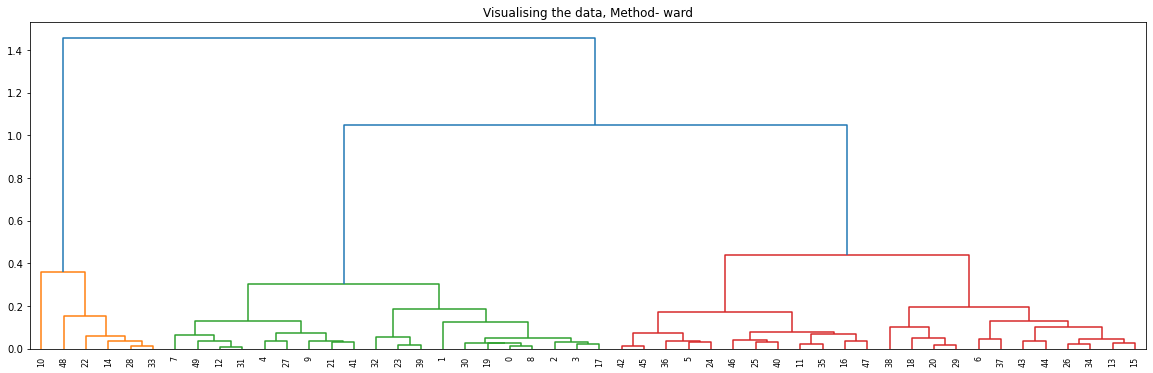

In [56]:
# Create dendrogram of normalization data for all methots 
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
     plt.figure(figsize =(20, 6))
     plt.title('Visualising the data, Method- {}'.format(methods)) 
     Dendrogram = sch.dendrogram(sch.linkage(crime_norm, method = methods,optimal_ordering=False))

In [58]:
# Calculating optimal number of cluster for data using silhoutte method
nc=[2,3,4,5,6,7,8,9]

for i in nc:
    for linkages in ['ward','single','average','complete']:
        hc = AgglomerativeClustering(n_clusters=i,affinity = 'euclidean', linkage = linkages)
        y = hc.fit_predict(crime_norm)
        sc=silhouette_score(crime_norm,y)
        print('Clusters = {}, linkage = {}, Sc score = {}'.format(i,linkages,sc))
    print()

Clusters = 2, linkage = ward, Sc score = 0.6037116221173207
Clusters = 2, linkage = single, Sc score = 0.5941710401826306
Clusters = 2, linkage = average, Sc score = 0.6037116221173207
Clusters = 2, linkage = complete, Sc score = 0.6037116221173207

Clusters = 3, linkage = ward, Sc score = 0.5359200720251941
Clusters = 3, linkage = single, Sc score = 0.5431936191625951
Clusters = 3, linkage = average, Sc score = 0.5431936191625951
Clusters = 3, linkage = complete, Sc score = 0.40861432250058

Clusters = 4, linkage = ward, Sc score = 0.44923935480079796
Clusters = 4, linkage = single, Sc score = 0.4966896266306986
Clusters = 4, linkage = average, Sc score = 0.5191395036557488
Clusters = 4, linkage = complete, Sc score = 0.4120453539053902

Clusters = 5, linkage = ward, Sc score = 0.4517242639432266
Clusters = 5, linkage = single, Sc score = 0.09816536549640345
Clusters = 5, linkage = average, Sc score = 0.4635175688797497
Clusters = 5, linkage = complete, Sc score = 0.4115211805628637



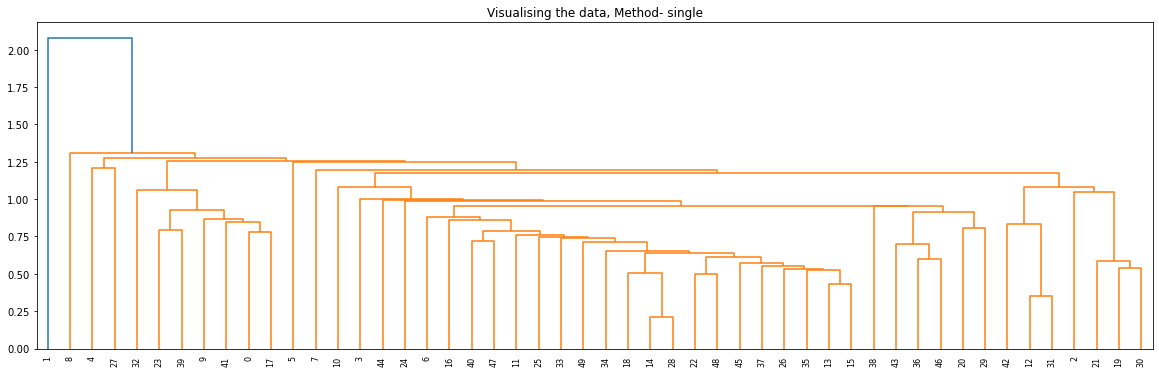

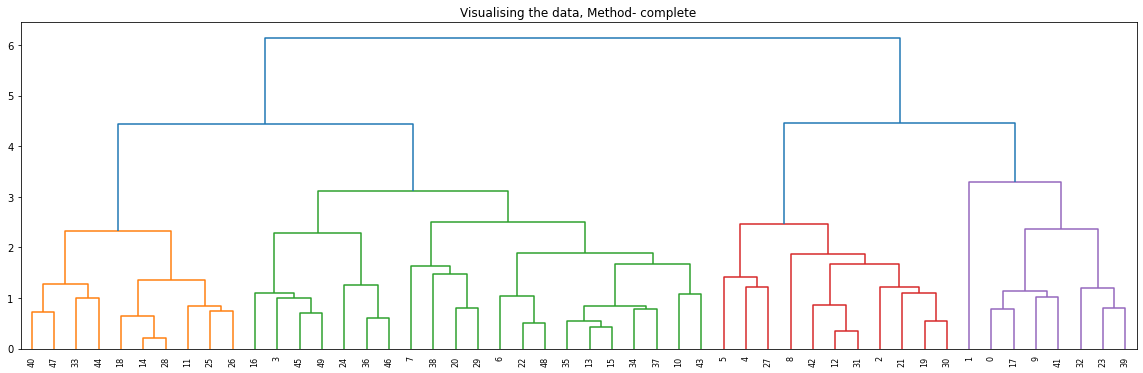

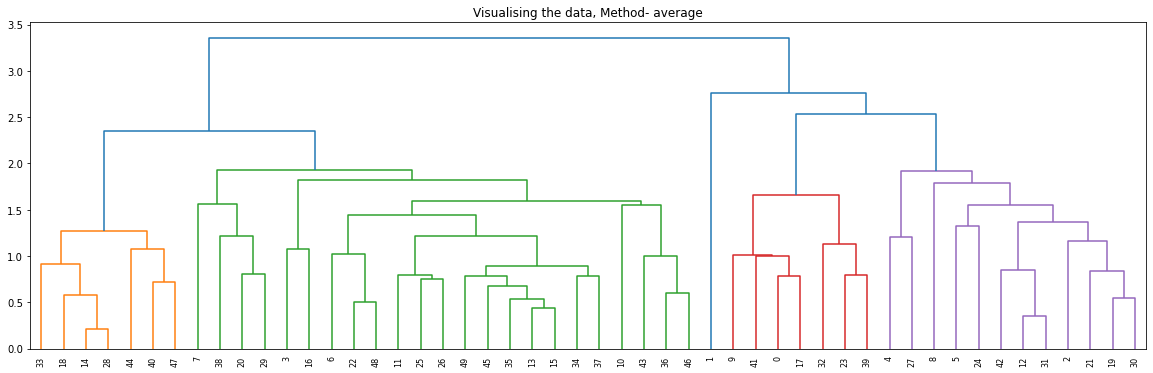

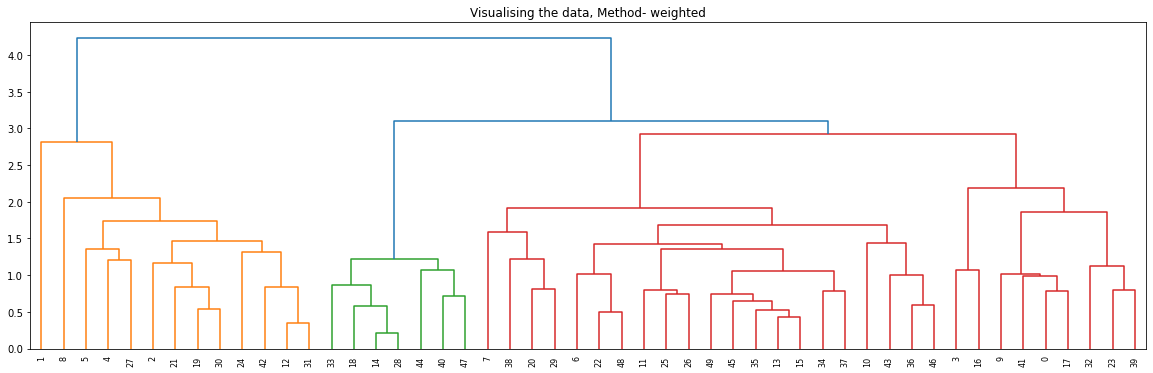

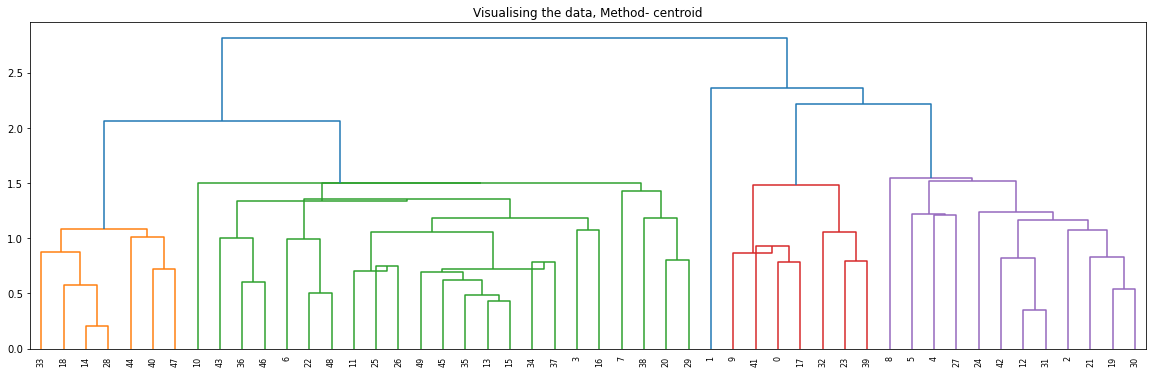

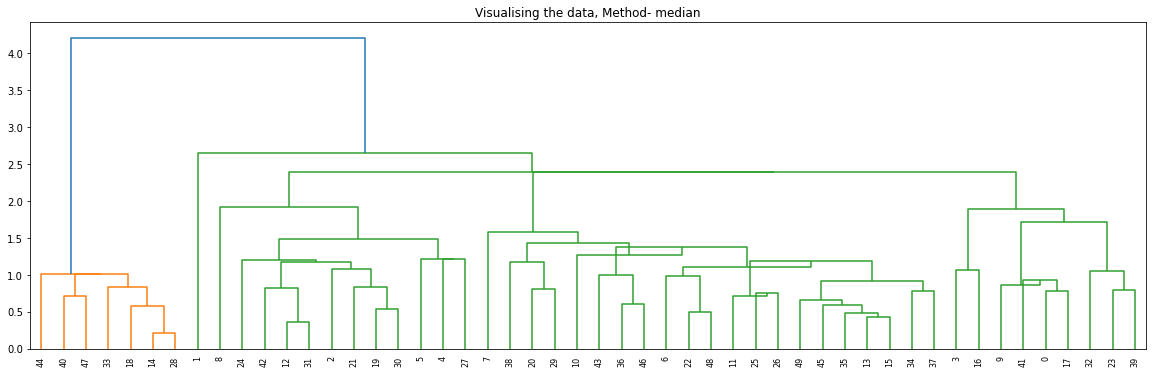

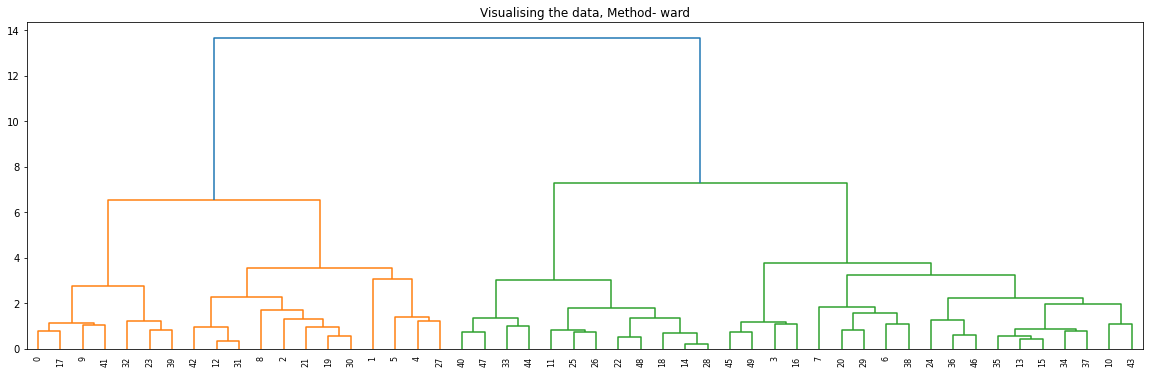

In [59]:
# Create dendrogram of standardization data for all methots 
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
     plt.figure(figsize =(20, 6))
     plt.title('Visualising the data, Method- {}'.format(methods)) 
     Dendrogram = sch.dendrogram(sch.linkage(crime_std, method = methods,optimal_ordering=False))

In [60]:
# Calculating optimal number of cluster for data using silhoutte method
nc=[2,3,4,5,6,7,8,9]

for i in nc:
    for linkages in ['ward','single','average','complete']:
        hc = AgglomerativeClustering(n_clusters=i,affinity = 'euclidean', linkage = linkages)
        y = hc.fit_predict(crime_std)
        sc=silhouette_score(crime_norm,y)
        print('Clusters = {}, linkage = {}, Sc score = {}'.format(i,linkages,sc))
    print()

Clusters = 2, linkage = ward, Sc score = 0.37326866995393393
Clusters = 2, linkage = single, Sc score = 0.05829446477243245
Clusters = 2, linkage = average, Sc score = 0.38019813016469306
Clusters = 2, linkage = complete, Sc score = 0.37326866995393393

Clusters = 3, linkage = ward, Sc score = 0.19315467283958992
Clusters = 3, linkage = single, Sc score = -0.1000940081869801
Clusters = 3, linkage = average, Sc score = 0.1975289459203582
Clusters = 3, linkage = complete, Sc score = 0.12632185957543615

Clusters = 4, linkage = ward, Sc score = 0.0008628928263781855
Clusters = 4, linkage = single, Sc score = -0.24195282542222787
Clusters = 4, linkage = average, Sc score = 0.11331515211920452
Clusters = 4, linkage = complete, Sc score = -0.04999161183997202

Clusters = 5, linkage = ward, Sc score = -0.06125725157423388
Clusters = 5, linkage = single, Sc score = -0.14837698133129007
Clusters = 5, linkage = average, Sc score = -0.03116028113398406
Clusters = 5, linkage = complete, Sc score =

### Conclusion
1. Normalization has the best results
2. Optimal number of clustering we get is 4 by seeing silhoutte score and dendrogram
3. Linkage we are using is average

### Model Creation

In [62]:
model = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')
y = model.fit_predict(crime_norm)
y

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 0, 3, 0, 0, 1, 0, 1, 0, 1,
       3, 1, 0, 0, 0, 1, 3, 0, 1, 1, 1, 3, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 3, 1], dtype=int64)

In [63]:
data1=pd.read_csv("crime_data.csv")

In [64]:
data1['cluster id']=y

In [65]:
data1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster id
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1


In [66]:
data1.groupby('cluster id').agg(['count']).reset_index()

,cluster id,Unnamed: 0,Murder,Assault,UrbanPop,Rape
,,count,count,count,count,count
0,0,24,24,24,24,24
1,1,20,20,20,20,20
2,2,1,1,1,1,1
3,3,5,5,5,5,5


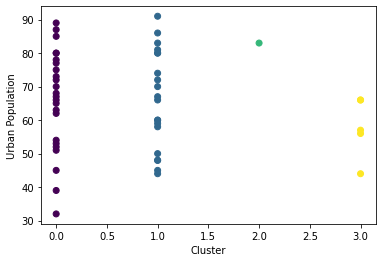

In [67]:
plt.scatter(data1['cluster id'],data1['UrbanPop'],c=model.labels_)
plt.xlabel('Cluster')
plt.ylabel('Urban Population')
plt.show()

###  KMeans clustering

In [69]:
#Finding optimal number of cluster for normalize data
#using Elbow method and silhoutte method

nc=[2,3,4,5,6,7,8,9]
iner=[]
silscore =[]

for i in nc:
    Km=KMeans(i)
    Km.fit(crime_norm)
    iner.append(Km.inertia_)

                    
for i in nc:
    hc = KMeans(n_clusters=i)
    y=hc.fit_predict(crime_norm)
    silscore.append(silhouette_score(crime_norm,y))

Text(0.5, 1.0, 'Silhoutte Score')

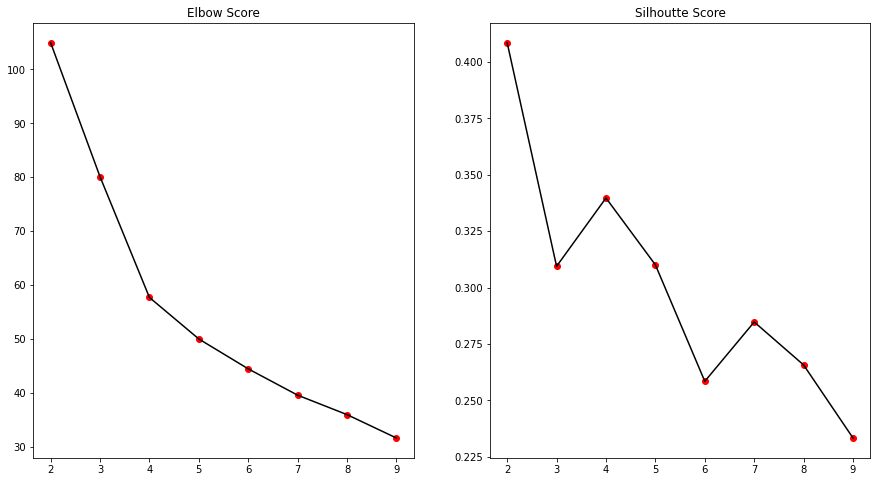

In [74]:
#plotting for normalize data
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.title('Elbow Score')
                    
plt.subplot(1,2,2)
plt.plot(nc,silscore,color="black")
plt.scatter(nc,silscore,color="red")
plt.title('Silhoutte Score')

In [75]:
#Finding optimal number of cluster for standerdize data
#using Elbow method and silhoutte method

nc=[2,3,4,5,6,7,8,9]
iner=[]
silscore =[]

for i in nc:
    Km=KMeans(i)
    Km.fit(crime_std)
    iner.append(Km.inertia_)

                    
for i in nc:
    hc = KMeans(n_clusters=i)
    y=hc.fit_predict(crime_std)
    silscore.append(silhouette_score(crime_std,y))

Text(0.5, 1.0, 'Silhoutte Score')

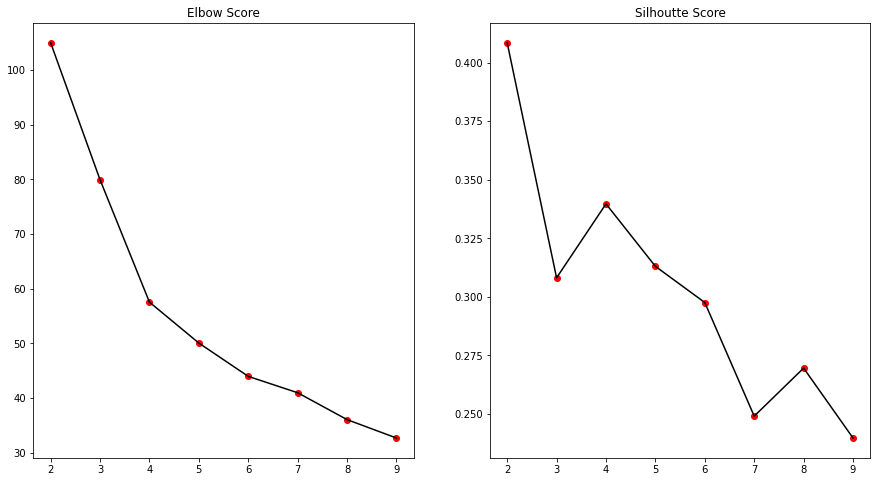

In [77]:
#plotiing for standardize data
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.title('Elbow Score')
                    
plt.subplot(1,2,2)
plt.plot(nc,silscore,color="black")
plt.scatter(nc,silscore,color="red")
plt.title('Silhoutte Score')

# Conclusion
1. Seeing both data we are getting best result for normalize data
2. Optimal number of clustering we get is 4 by seeing silhoutte score and elbow method

In [78]:
Km=KMeans(4)
Km.fit(crime_norm)
Km.labels_

array([0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 3, 0, 1, 2, 1, 3, 0, 1, 0, 1, 0,
       2, 0, 3, 3, 1, 0, 2, 1, 0, 0, 0, 2, 1, 3, 3, 1, 3, 0, 3, 0, 3, 1,
       1, 3, 3, 3, 2, 3])

In [79]:
data2=pd.read_csv("crime_data.csv")
data2['cluster id']=pd.Series(Km.labels_)
data2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster id
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [80]:
data2.groupby('cluster id').agg(['count']).reset_index()

,cluster id,Unnamed: 0,Murder,Assault,UrbanPop,Rape
,,count,count,count,count,count
0,0,19,19,19,19,19
1,1,11,11,11,11,11
2,2,6,6,6,6,6
3,3,14,14,14,14,14


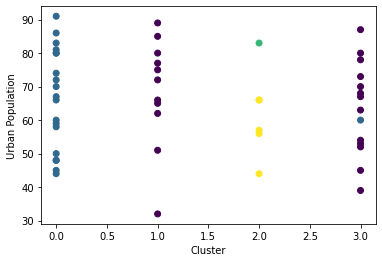

In [81]:
plt.scatter(data2['cluster id'],data1['UrbanPop'],c=model.labels_)
plt.xlabel('Cluster')
plt.ylabel('Urban Population')
plt.show()

###  DBscan

In [82]:
data1=scaler.fit_transform(crimeData)

In [83]:
dbs=DBSCAN(min_samples=2,eps=0.2)
claas_pr=dbs.fit_predict(data1)
claas_pr

array([ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  2,  1,  1,  1, -1,
        0,  1,  3, -1,  3,  1,  4, -1,  1,  1, -1,  1, -1,  3,  2, -1,  1,
        1,  1,  5,  1, -1,  4,  1, -1, -1,  5, -1,  1,  5,  1,  1,  1],
      dtype=int64)

In [84]:
dbs_df1=crimeData.copy()
dbs_df1['clusters']=claas_pr
dbs_df1['clusters'].value_counts()

-1    20
 1    18
 3     3
 5     3
 0     2
 2     2
 4     2
Name: clusters, dtype: int64

In [85]:
# Using groupby function to sort by Clusters
dbs_df.groupby(['clusters']).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster id
clusters,,,,,,,,,,,
-1,208387.747423,1478.484536,2.819588,1.154639,1.252577,50933.613402,27.000000,3214.154639,9.515464,5024.206186,0.93299
0,62691.605174,142.499660,1.000000,1.000000,1.000000,3187.840027,6.127297,451.245065,1.361470,3546.405037,0.00000
1,11710.840731,13.224543,1.000000,1.000000,1.000000,961.973890,3.446475,94.433420,0.297650,4904.253264,4.00000
2,84687.852113,38.651408,4.000000,1.000000,1.000000,39273.302817,18.626761,335.218310,0.950704,4696.095070,1.00000
3,46832.533865,38.533865,3.000000,1.000000,1.000000,20106.673307,15.992032,186.537849,0.573705,3900.689243,1.00000
4,130526.360902,39.958647,3.000000,1.000000,1.000000,18220.330827,16.552632,262.067669,0.763158,4828.458647,0.00000
5,86755.837209,36.156977,2.000000,1.000000,1.000000,9496.912791,14.186047,124.883721,0.383721,4415.953488,0.00000
6,147031.790210,41.202797,5.000000,1.000000,1.000000,71001.272727,21.076923,322.293706,1.034965,5082.433566,1.00000
7,28246.287356,55.597701,4.000000,1.000000,1.000000,41139.402299,18.517241,262.735632,0.862069,4445.126437,2.00000
